# Setting up our Schema

Spark can automatically create a schema for CSV files, but ours don't have headings. Let's set this up here:

In [1]:
from pyspark.sql.types import StructType, StructField, FloatType, LongType, StringType

feats = []
f = open('features.txt')
for line_num, line in enumerate(f):
    if line_num == 0:
        # Timestamp
        feats.append(StructField(line.strip(), LongType(), True))
    elif line_num == 1:
        # Geohash
        feats.append(StructField(line.strip(), StringType(), True))
    else:
        # Other features
        feats.append(StructField(line.strip(), FloatType(), True))
    
schema = StructType(feats)

print(schema)


StructType(List(StructField(Timestamp,LongType,true),StructField(Geohash,StringType,true),StructField(geopotential_height_lltw,FloatType,true),StructField(water_equiv_of_accum_snow_depth_surface,FloatType,true),StructField(drag_coefficient_surface,FloatType,true),StructField(sensible_heat_net_flux_surface,FloatType,true),StructField(categorical_ice_pellets_yes1_no0_surface,FloatType,true),StructField(visibility_surface,FloatType,true),StructField(number_of_soil_layers_in_root_zone_surface,FloatType,true),StructField(categorical_freezing_rain_yes1_no0_surface,FloatType,true),StructField(pressure_reduced_to_msl_msl,FloatType,true),StructField(upward_short_wave_rad_flux_surface,FloatType,true),StructField(relative_humidity_zerodegc_isotherm,FloatType,true),StructField(categorical_snow_yes1_no0_surface,FloatType,true),StructField(u-component_of_wind_tropopause,FloatType,true),StructField(surface_wind_gust_surface,FloatType,true),StructField(total_cloud_cover_entire_atmosphere,FloatType,tru

# Creating a Dataframe

Let's load our CSV into a 'dataframe' - Spark's abstraction for working with tabular data (built on top of RDDs)

In [2]:
nam_t = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:15000/nam_tiny.tdv')
nam_s = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:15000/nam_s/*')

In [16]:
nam_t.cache()
nam_s.cache()

DataFrame[Timestamp: bigint, Geohash: string, geopotential_height_lltw: float, water_equiv_of_accum_snow_depth_surface: float, drag_coefficient_surface: float, sensible_heat_net_flux_surface: float, categorical_ice_pellets_yes1_no0_surface: float, visibility_surface: float, number_of_soil_layers_in_root_zone_surface: float, categorical_freezing_rain_yes1_no0_surface: float, pressure_reduced_to_msl_msl: float, upward_short_wave_rad_flux_surface: float, relative_humidity_zerodegc_isotherm: float, categorical_snow_yes1_no0_surface: float, u-component_of_wind_tropopause: float, surface_wind_gust_surface: float, total_cloud_cover_entire_atmosphere: float, upward_long_wave_rad_flux_surface: float, land_cover_land1_sea0_surface: float, vegitation_type_as_in_sib_surface: float, v-component_of_wind_pblri: float, albedo_surface: float, lightning_surface: float, ice_cover_ice1_no_ice0_surface: float, convective_inhibition_surface: float, pressure_surface: float, transpiration_stress-onset_soil_mo

In [40]:
nam = spark.read.format('csv').option('sep', '\t').schema(schema).load('hdfs://orion11:15000/nam/*')
nam.cache()

DataFrame[Timestamp: bigint, Geohash: string, geopotential_height_lltw: float, water_equiv_of_accum_snow_depth_surface: float, drag_coefficient_surface: float, sensible_heat_net_flux_surface: float, categorical_ice_pellets_yes1_no0_surface: float, visibility_surface: float, number_of_soil_layers_in_root_zone_surface: float, categorical_freezing_rain_yes1_no0_surface: float, pressure_reduced_to_msl_msl: float, upward_short_wave_rad_flux_surface: float, relative_humidity_zerodegc_isotherm: float, categorical_snow_yes1_no0_surface: float, u-component_of_wind_tropopause: float, surface_wind_gust_surface: float, total_cloud_cover_entire_atmosphere: float, upward_long_wave_rad_flux_surface: float, land_cover_land1_sea0_surface: float, vegitation_type_as_in_sib_surface: float, v-component_of_wind_pblri: float, albedo_surface: float, lightning_surface: float, ice_cover_ice1_no_ice0_surface: float, convective_inhibition_surface: float, pressure_surface: float, transpiration_stress-onset_soil_mo

# Playtime

# SQL

In [3]:
from pyspark.sql import functions as F

In [3]:
# Creating an SQL 'table'
nam_t.createOrReplaceTempView("nam_t")
nam_s.createOrReplaceTempView("nam_s")

In [4]:
spark.catalog.cacheTable("nam_t")
spark.catalog.cacheTable("nam_s")

In [41]:
nam.createOrReplaceTempView("nam")
spark.catalog.cacheTable("nam")

#### Unknown Feature
I didn't know what albedo was, so I looked at its summary statistics. Still unsure, I looked up the definition: 'the proportion of the incident light or radiation that is reflected by a surface, typically that of a planet or moon.'

In [19]:
nam_t.describe('albedo_surface').show()

+-------+----------------+
|summary|  albedo_surface|
+-------+----------------+
|  count|             100|
|   mean|           18.07|
| stddev|17.4802948221907|
|    min|             6.0|
|    max|            76.0|
+-------+----------------+



#### Hot Hot Hot
The hottest tempurature in the dataset is 330.67431640625 at location d5f0jqerq27bat (21.13070154, -86.9520505; Benito Juárez, Quintana Roo, Mexico) at time 2015-08-23T18:00Z. This record is not surprising, as it is near the equator in the summer. Looking at the other highest tempuratures which are near this highest one, it does not appear to be an anomaly. 

In [23]:
temp_desc = nam_s.orderBy("temperature_surface", ascending=False)
temp_desc.cache()

DataFrame[Timestamp: bigint, Geohash: string, geopotential_height_lltw: float, water_equiv_of_accum_snow_depth_surface: float, drag_coefficient_surface: float, sensible_heat_net_flux_surface: float, categorical_ice_pellets_yes1_no0_surface: float, visibility_surface: float, number_of_soil_layers_in_root_zone_surface: float, categorical_freezing_rain_yes1_no0_surface: float, pressure_reduced_to_msl_msl: float, upward_short_wave_rad_flux_surface: float, relative_humidity_zerodegc_isotherm: float, categorical_snow_yes1_no0_surface: float, u-component_of_wind_tropopause: float, surface_wind_gust_surface: float, total_cloud_cover_entire_atmosphere: float, upward_long_wave_rad_flux_surface: float, land_cover_land1_sea0_surface: float, vegitation_type_as_in_sib_surface: float, v-component_of_wind_pblri: float, albedo_surface: float, lightning_surface: float, ice_cover_ice1_no_ice0_surface: float, convective_inhibition_surface: float, pressure_surface: float, transpiration_stress-onset_soil_mo

In [26]:
hottest_record = temp_desc.first()

In [30]:
hottest_record['temperature_surface']

330.67431640625

In [27]:
from datetime import datetime, timezone
timestamp = hottest_record['Timestamp'] / 1000
datetime.fromtimestamp(timestamp, timezone.utc)

datetime.datetime(2015, 8, 23, 18, 0, tzinfo=datetime.timezone.utc)

In [28]:
hottest_record['Geohash']

'd5f0jqerq27b'

In [33]:
temp_desc.select("temperature_surface", "Timestamp", "Geohash").head(10)

[Row(temperature_surface=330.67431640625, Timestamp=1440352800000, Geohash='d5f0jqerq27b'),
 Row(temperature_surface=330.640625, Timestamp=1440266400000, Geohash='d5f0vd8eb80p'),
 Row(temperature_surface=330.6044921875, Timestamp=1430157600000, Geohash='9g77js659k20'),
 Row(temperature_surface=330.53662109375, Timestamp=1439056800000, Geohash='d5f0jqerq27b'),
 Row(temperature_surface=330.48193359375, Timestamp=1440612000000, Geohash='d59d5yttuc5b'),
 Row(temperature_surface=330.35693359375, Timestamp=1440612000000, Geohash='d59eqv7e03pb'),
 Row(temperature_surface=330.23193359375, Timestamp=1440612000000, Geohash='d59dntd726gz'),
 Row(temperature_surface=330.220703125, Timestamp=1440698400000, Geohash='d59eqv7e03pb'),
 Row(temperature_surface=330.179931640625, Timestamp=1438279200000, Geohash='d5f04xyhucez'),
 Row(temperature_surface=330.14990234375, Timestamp=1439488800000, Geohash='d5dpds10m55b')]

In [46]:
temp_desc.unpersist()

DataFrame[Timestamp: bigint, Geohash: string, geopotential_height_lltw: float, water_equiv_of_accum_snow_depth_surface: float, drag_coefficient_surface: float, sensible_heat_net_flux_surface: float, categorical_ice_pellets_yes1_no0_surface: float, visibility_surface: float, number_of_soil_layers_in_root_zone_surface: float, categorical_freezing_rain_yes1_no0_surface: float, pressure_reduced_to_msl_msl: float, upward_short_wave_rad_flux_surface: float, relative_humidity_zerodegc_isotherm: float, categorical_snow_yes1_no0_surface: float, u-component_of_wind_tropopause: float, surface_wind_gust_surface: float, total_cloud_cover_entire_atmosphere: float, upward_long_wave_rad_flux_surface: float, land_cover_land1_sea0_surface: float, vegitation_type_as_in_sib_surface: float, v-component_of_wind_pblri: float, albedo_surface: float, lightning_surface: float, ice_cover_ice1_no_ice0_surface: float, convective_inhibition_surface: float, pressure_surface: float, transpiration_stress-onset_soil_mo

#### So Snowy
The location where it snows most often is c41uhb4r5n00 (56.9543589, -132.32710345; City and Borough of Wrangell, AK). 

In [42]:
so_snowy_s = spark.sql("SELECT geohash, sum, cnt, (sum / cnt) AS div \
            FROM ( \
                SELECT geohash, SUM(categorical_snow_yes1_no0_surface) AS sum, COUNT(*) as cnt \
                FROM nam_s \
                GROUP BY(geohash) \
            ) ORDER BY div DESC")
so_snowy_s.cache()

DataFrame[geohash: string, sum: double, cnt: bigint, div: double]

In [48]:
so_snowy_s.head(100)

[Row(geohash='c41uhb4r5n00', sum=168.0, cnt=421, div=0.3990498812351544),
 Row(geohash='c45277s4gjpb', sum=163.0, cnt=423, div=0.38534278959810875),
 Row(geohash='c44jc11cn1rz', sum=165.0, cnt=433, div=0.3810623556581986),
 Row(geohash='c41yek3dwk2p', sum=152.0, cnt=403, div=0.3771712158808933),
 Row(geohash='c1uz20wg2gxb', sum=141.0, cnt=376, div=0.375),
 Row(geohash='c439n53vsxzz', sum=155.0, cnt=417, div=0.37170263788968827),
 Row(geohash='c1gv86v08280', sum=148.0, cnt=401, div=0.3690773067331671),
 Row(geohash='c1gy5p6c9n2p', sum=150.0, cnt=407, div=0.36855036855036855),
 Row(geohash='c41uxkww12rz', sum=148.0, cnt=403, div=0.36724565756823824),
 Row(geohash='c1gru77j5fzz', sum=167.0, cnt=455, div=0.367032967032967),
 Row(geohash='c44srx2d2tzz', sum=158.0, cnt=431, div=0.3665893271461717),
 Row(geohash='c43kcu3t702p', sum=149.0, cnt=409, div=0.3643031784841076),
 Row(geohash='c43k6uu1egxb', sum=150.0, cnt=412, div=0.3640776699029126),
 Row(geohash='c44j614gx8xb', sum=141.0, cnt=389,

In [49]:
so_snowy = spark.sql("SELECT geohash, sum, cnt, (sum / cnt) AS div \
            FROM ( \
                SELECT geohash, SUM(categorical_snow_yes1_no0_surface) AS sum, COUNT(*) as cnt \
                FROM nam \
                GROUP BY(geohash) \
            ) \
            ORDER BY div DESC \
            LIMIT 100")

In [50]:
so_snowy.head(10)

Py4JJavaError: An error occurred while calling o283.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 37.0 failed 4 times, most recent failure: Lost task 1.3 in stage 37.0 (TID 937, 10.0.1.21, executor 2): java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:65)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at org.apache.spark.storage.CountingWritableChannel.write(DiskStore.scala:314)
	at java.nio.channels.Channels.writeFullyImpl(Channels.java:78)
	at java.nio.channels.Channels.writeFully(Channels.java:101)
	at java.nio.channels.Channels.access$000(Channels.java:61)
	at java.nio.channels.Channels$1.write(Channels.java:174)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:122)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:220)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:173)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.writeByte(ObjectOutputStream.java:1915)
	at java.io.ObjectOutputStream.writeFatalException(ObjectOutputStream.java:1576)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:351)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:43)
	at org.apache.spark.serializer.SerializationStream.writeAll(Serializer.scala:140)
	at org.apache.spark.serializer.SerializerManager.dataSerializeStream(SerializerManager.scala:174)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1$$anonfun$apply$7.apply(BlockManager.scala:1101)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1$$anonfun$apply$7.apply(BlockManager.scala:1099)
	at org.apache.spark.storage.DiskStore.put(DiskStore.scala:68)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1099)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1018)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:809)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2131)
	at org.apache.spark.rdd.RDD$$anonfun$reduce$1.apply(RDD.scala:1029)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.reduce(RDD.scala:1011)
	at org.apache.spark.rdd.RDD$$anonfun$takeOrdered$1.apply(RDD.scala:1433)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.takeOrdered(RDD.scala:1420)
	at org.apache.spark.sql.execution.TakeOrderedAndProjectExec.executeCollect(limit.scala:135)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3195)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3192)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3254)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3253)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3192)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:65)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at org.apache.spark.storage.CountingWritableChannel.write(DiskStore.scala:314)
	at java.nio.channels.Channels.writeFullyImpl(Channels.java:78)
	at java.nio.channels.Channels.writeFully(Channels.java:101)
	at java.nio.channels.Channels.access$000(Channels.java:61)
	at java.nio.channels.Channels$1.write(Channels.java:174)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:122)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:220)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:173)
	at java.io.ObjectOutputStream$BlockDataOutputStream.drain(ObjectOutputStream.java:1877)
	at java.io.ObjectOutputStream$BlockDataOutputStream.writeByte(ObjectOutputStream.java:1915)
	at java.io.ObjectOutputStream.writeFatalException(ObjectOutputStream.java:1576)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:351)
	at org.apache.spark.serializer.JavaSerializationStream.writeObject(JavaSerializer.scala:43)
	at org.apache.spark.serializer.SerializationStream.writeAll(Serializer.scala:140)
	at org.apache.spark.serializer.SerializerManager.dataSerializeStream(SerializerManager.scala:174)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1$$anonfun$apply$7.apply(BlockManager.scala:1101)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1$$anonfun$apply$7.apply(BlockManager.scala:1099)
	at org.apache.spark.storage.DiskStore.put(DiskStore.scala:68)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1099)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1018)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1083)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:809)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


# Analysis

### Strangely Snowy 
Find a location that contains snow while its surroundings do not. Why does this occur? Is it a high mountain peak in a desert?

### Lightning rod
Where are you most likely to be struck by lightning? Use a precision of at least 4 Geohash characters and provide the top 3 locations.

In [85]:
lightning_rod = spark.sql("\
                           SELECT LEFT(geohash, 4) AS geo4, SUM(lightning_surface) / COUNT(*) AS prob_lightning \
                           FROM nam_s \
                           GROUP BY geo4 \
                           ORDER BY prob_lightning DESC \
                           LIMIT 3")

In [86]:
lightning_rod.collect()

[Row(geo4='9g3v', prob_lightning=0.3184),
 Row(geo4='9g3h', prob_lightning=0.29589905362776026),
 Row(geo4='9g3m', prob_lightning=0.29389942291838417)]

### Drying out
(Choose a region in North America (defined by one or more Geohashes) and determine when its driest month is. This should include a histogram with data from each month.)

In the San Francisco Bay Area, the driest (i.e. least humid) month is August, as seen in the humidity values averaged for each month below.

In [16]:
nam_s_bayarea = spark.read.format('csv').option('sep', ',').schema(schema).load('hdfs://orion11:15000/nam_s_bayarea/*')
nam_s_bayarea.createOrReplaceTempView("nam_s_bayarea")
spark.catalog.cacheTable("nam_s_bayarea")

In [88]:
drying_out = spark.sql("\
    SELECT \
        trunc(from_unixtime(timestamp DIV 1000), 'MM') AS year_month, \
        AVG(relative_humidity_zerodegc_isotherm) AS avg_humidity, \
        COUNT(*) AS count \
    FROM nam_s_bayarea \
    GROUP BY year_month \
    ORDER BY year_month")

In [89]:
drying_out.show()

+----------+------------------+-----+
|year_month|      avg_humidity|count|
+----------+------------------+-----+
|2015-01-01|31.324879025529786| 5993|
|2015-02-01|28.585786986550346| 5502|
|2015-03-01| 23.24552213585671| 5918|
|2015-04-01| 35.07409362900387| 5682|
|2015-05-01| 30.44884776536313| 5728|
|2015-06-01| 25.14540059347181| 5729|
|2015-07-01|35.376506024096386| 5644|
|2015-08-01|22.981870400287203| 5571|
|2015-09-01| 29.28472104459895| 5897|
|2015-10-01|31.750963222416814| 5710|
|2015-11-01|38.616337929830685| 5729|
|2015-12-01| 50.35549132947977| 5536|
+----------+------------------+-----+



In [82]:
monthly_humidity = drying_out.collect();

In [83]:
months = list(map(lambda row: row['year_month'].month, monthly_humidity))
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [84]:
humidities = list(map(lambda row: row['avg_humidity'], monthly_humidity))
humidities

[31.324879025529786,
 28.585786986550346,
 23.24552213585671,
 35.07409362900387,
 30.44884776536313,
 25.14540059347181,
 35.376506024096386,
 22.981870400287203,
 29.28472104459895,
 31.750963222416814,
 38.616337929830685,
 50.35549132947977]

In [67]:
min(humidities)

22.981870400287203

In [35]:
import matplotlib.pyplot as plt

In [69]:
def plot_bar(labels, values, xlabel = "", ylabel = "", title = ""):
    positions = range(len(labels))
    plt.bar(positions, values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(positions, labels)
    plt.title(title)
    plt.show()

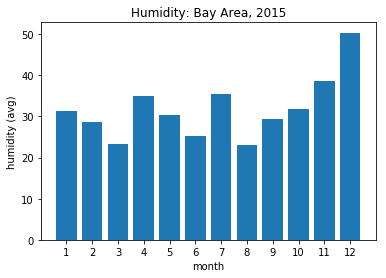

In [78]:
plot_bar(months, humidities, 
           xlabel = "month",
           ylabel = "humidity (avg)",
           title = "Humidity: Bay Area, 2015")

### Travel Startup
After graduating from USF, you found a startup that aims to provide personalized travel itineraries using big data analysis. Given your own personal preferences, build a plan for a year of travel across 5 locations. Or, in other words: pick 5 regions. What is the best time of year to visit them based on the dataset?

- One avenue here could be determining the comfort index for a region. You could incorporate several features: not too hot, not too cold, dry, humid, windy, etc. There are several different ways of calculating this available online, and you could also analyze how well your own metrics do.

### Escaping the fog
After becoming rich from your startup, you are looking for the perfect location to build your Bay Area mansion with unobstructed views. Find the locations that are the least foggy and show them on a map.


In [99]:
escaping_fog = spark.sql("\
SELECT \
    LEFT(geohash, 4) AS geo4, \
    AVG(visibility_surface) AS avg_visibility \
    COUNT(*) AS count \
FROM nam_s_bayarea \
GROUP BY geo4 \
ORDER BY avg_visibility")

In [100]:
escaping_fog.show()

+----+------------------+
|geo4|    avg_visibility|
+----+------------------+
|9qb9|18866.500605645666|
|9qb6|20399.862331219643|
|9qb8|20552.363280207388|
|9q8u|20594.105991876255|
|9qb3| 20937.62078815212|
|9q8v| 20957.84047165712|
|9qb7| 21085.58722571984|
|9q8y|21230.055428700784|
|9qbd|21285.232498519046|
|9q8x|21311.084569252158|
|9q8g| 21326.57320909403|
|9qbh|21367.223755599265|
|9qbc| 21545.05316134313|
|9qbk|21968.482188283397|
|9qbf| 22235.38120562749|
|9q9h|22280.085210652833|
|9q8z|22605.161260960067|
|9q9n|22618.017425336275|
|9q9k|22723.900763805847|
|9q9m| 22729.76162779337|
+----+------------------+
only showing top 20 rows



### SolarWind, Inc.
You get bored enjoying the amazing views from your mansion, so you start a new company; here, you want to help power companies plan out the locations of solar and wind farms across North America. Locate the top 3 places for solar and wind farms, as well as a combination of both (solar + wind farm). You will report a total of 9 Geohashes as well as their relevant attributes (for example, cloud cover and wind speeds).

# Sampling

We can even create a sample dataset with Spark! Let's create a 10% sample (without replacement)

In [ ]:
samp = df.sample(False, .1)

# Write it out to a file
samp.write.format('csv').save('hdfs://orion12:50000/sampled_output.csv')

In [54]:
nam_s_bayarea = spark.sql("\
SELECT * \
FROM nam_s \
WHERE LEFT(geohash, 4) IN ( \
 '9q8x', '9q8z', '9q8y', '9q8v', '9q8u', '9q8g', \
 '9q9p', '9q9n', '9q9j', '9q9h', '9q95', '9q9r', '9q9q', '9q9m', '9q9k', '9q97', '9q9e', \
 '9qb3', '9q95', '9qb6', '9qb7', '9qb8', '9qb9', '9qbb', '9qbc', '9qbd', '9qbe', '9qbf', '9qbg', '9qbh', '9qbk', '9qbs', \
 '9qc0', '9qc1', '9qc2', '9qc3', '9qc4', '9qc5', '9qc6', '9qch' \
)")

In [55]:
nam_s_bayarea.write.format('csv').save('hdfs://orion11:15000/nam_s_bayarea')